In [1]:
import tensorflow as tf

In [2]:
# set the variables
x = tf.Variable(3,name = "x")
y = tf.Variable(4, name='y')

# create the computation graph
f = x*x*y+y+2

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# create session
sess = tf.Session()

# initialize variables
sess.run(x.initializer)
sess.run(y.initializer)

result = sess.run(f)
print(result)

sess.close()

42


In [4]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    
    result = f.eval()
result

42

In [5]:
init = tf.global_variables_initializer() # prepare an init node

with tf.Session() as sess:
    init.run()
    result = f.eval()
result

42

Any node created is automaticaly added to the default graph

In [6]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [7]:
graph = tf.Graph()
with graph.as_default():
    # create x2 on the default graph (which is temporarilly graph)
    x2 = tf.Variable(2)

print(x2.graph is graph)

print(x2.graph is tf.get_default_graph())

True
False


In [8]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

# run twice x and w.
with tf.Session() as sess:
    print(y.eval()) # 10
    print(z.eval()) # 15

10
15


In [9]:
# run onl once w and x.
with tf.Session() as sess:
    y_val, z_val = sess.run([y,z])
    print(y_val)
    print(z_val)

10
15


## Keras API

In [10]:
from tensorflow import keras

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [12]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
import matplotlib.pyplot as plt

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


def plot_image(img):
    plt.imshow(img,cmap='binary')
    plt.axis(False)
plot_image(X_train[0])
plt.show()

print(class_names[y_train[0]])

<Figure size 640x480 with 1 Axes>

Coat


## Sequential API
#### MLP Regression

In [14]:
model = keras.Sequential() # sequential API

# convert input into 1D array = preprocessing. First layer => specify input_shape
model.add(keras.layers.Flatten(input_shape=[28,28]))
# Fully connected / Dense layer, specify nb units and activation functions.
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
print(model.layers[1].name)
print(model.get_layer('dense').name)

dense
dense


In [17]:
# Use sparse_categorical_crossentropy because we have y sparse, cad y = nb between 0 and 9.
# It is not one-hot encoded vec.

model.compile(loss='sparse_categorical_crossentropy', # or keras.losses.sparse_categorical_crossentropy
             optimizer='sgd', # or keras.optimizers.SGD()
             metrics=['accuracy']) # or [keras.metrics.sparse_categorical_accuracy]

In [18]:
history = model.fit(X_train,y_train, epochs=30, validation_data=(X_valid,y_valid), verbose=1, batch_size=32)
# set class_weight if underrepresented classes

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 116us/sample - loss: 0.7206 - acc: 0.7634 - val_loss: 0.5249 - val_acc: 0.8190
Epoch 2/30
55000/55000 [==============================] - 6s 109us/sample - loss: 0.4917 - acc: 0.8286 - val_loss: 0.4844 - val_acc: 0.8314
Epoch 3/30
55000/55000 [==============================] - 6s 108us/sample - loss: 0.4483 - acc: 0.8423 - val_loss: 0.4544 - val_acc: 0.8404
Epoch 4/30
55000/55000 [==============================] - 6s 108us/sample - loss: 0.4219 - acc: 0.8509 - val_loss: 0.4347 - val_acc: 0.8470
Epoch 5/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.4008 - acc: 0.8587 - val_loss: 0.3904 - val_acc: 0.8664
Epoch 6/30
55000/55000 [==============================] - 6s 108us/sample - loss: 0.3856 - acc: 0.8654 - val_loss: 0.3787 - val_acc: 0.8716
Epoch 7/30
55000/55000 [==============================] - 6s 108us/sample - loss: 0.3717 - acc: 0.8693 - val_lo

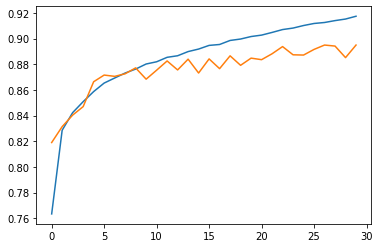

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(history.epoch,acc)
plt.plot(history.epoch,val_acc)
plt.show()

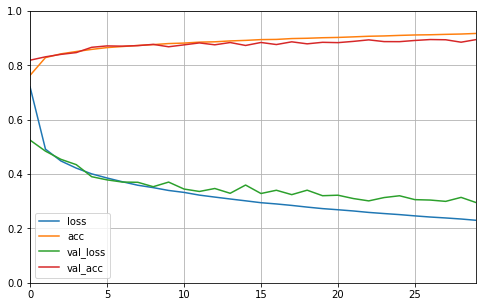

In [20]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 64us/sample - loss: 2.3055 - acc: 0.8546


[2.305491944849483, 0.8546]

In [22]:
preds = model.predict(X_test[:3])
preds

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### MLP Regression

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [24]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 11610 samples, validate on 3870 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
11610/11610 [==============================] - 1s 73us/sample - loss: 2.2589 - val_loss: 1.5993
Epoch 2/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.8548 - val_loss: 0.7635
Epoch 3/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.7383 - val_loss: 0.6978
Epoch 4/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6900 - val_loss: 0.6669
Epoch 5/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6513 - val_loss: 0.7204
Epoch 6/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6215 - val_loss: 0.5869
Epoch 7/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5929 - val_loss: 0.5517
Epoch 8/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5682 - val_loss: 0.5282

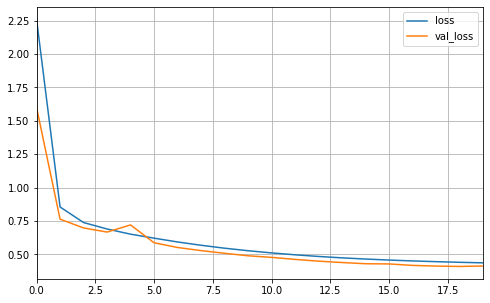

In [25]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

## Functionnal API

build more complexe architecture with re-use of the inputs in the last layer to keep some simple relations

In [26]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [28]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 74us/sample - loss: 2.0912 - val_loss: 14.1523
Epoch 2/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.7528 - val_loss: 1.8473
Epoch 3/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.6013 - val_loss: 0.7340
Epoch 4/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5621 - val_loss: 0.5098
Epoch 5/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5272 - val_loss: 0.4975
Epoch 6/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5021 - val_loss: 0.4619
Epoch 7/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4812 - val_loss: 0.4407
Epoch 8/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.4646 - val_loss: 0.4527
Epoch 9/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4509 - val_

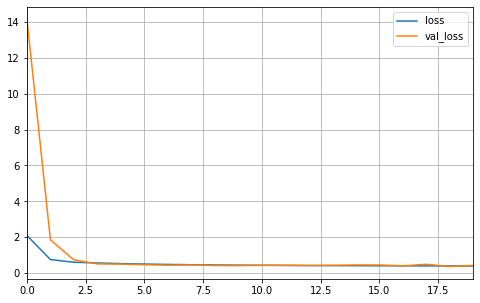

In [29]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

build more complexe architecture spliting the features. Some are use during the whole process and other are use only in the end.

In [30]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [31]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 78us/sample - loss: 2.3538 - val_loss: 1.0793
Epoch 2/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.8870 - val_loss: 0.7795
Epoch 3/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.7280 - val_loss: 0.6834
Epoch 4/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6684 - val_loss: 0.6324
Epoch 5/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.6301 - val_loss: 0.5958
Epoch 6/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.6001 - val_loss: 0.5714
Epoch 7/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.5747 - val_loss: 0.5401
Epoch 8/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5528 - val_loss: 0.5180
Epoch 9/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5329 - val_l

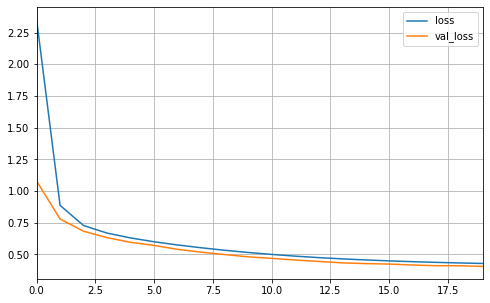

In [32]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

Outputs auxilaires

In [33]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1)(hidden2)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [34]:
# preciser loss pour chaque output, donner un poids
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

# donner y_train et y_val plusieurs fois
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 97us/sample - loss: 1.0195 - output_loss: 0.9159 - dense_12_loss: 1.9496 - val_loss: 17.0193 - val_output_loss: 18.7107 - val_dense_12_loss: 1.7114
Epoch 2/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.6544 - output_loss: 0.6080 - dense_12_loss: 1.0693 - val_loss: 2.2929 - val_output_loss: 2.4438 - val_dense_12_loss: 0.9244
Epoch 3/20
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4910 - output_loss: 0.4503 - dense_12_loss: 0.8578 - val_loss: 1.7504 - val_output_loss: 1.8202 - val_dense_12_loss: 1.1156
Epoch 4/20
11610/11610 [==============================] - 1s 49us/sample - loss: 0.4560 - output_loss: 0.4235 - dense_12_loss: 0.7486 - val_loss: 0.7665 - val_output_loss: 0.7711 - val_dense_12_loss: 0.7224
Epoch 5/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4397 - output_loss: 0.4136 - dense_12_

In [35]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

5160/5160 [==============================] - 0s 39us/sample - loss: 0.3640 - output_loss: 0.3515 - dense_12_loss: 0.4769


## Subclassing API

In [36]:
class WideAndDeepModel(keras.models.Model):
    """
        - Split the creation of the model from their usage (with a specific input) 
    """
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # handle standard args
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output

#model = WideAndDeepModel(units=30, activation='relu')

## Savings and Callbacks

In [37]:
model.save("my_keras_model.h5")
model = keras.models.load_model("my_keras_model.h5")

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), 
                    callbacks=[checkpoint_cb])

In [ ]:
# save best model only
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), 
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # rollback to best model

In [ ]:
# early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), 
                    callbacks=[checkpoint_cb,early_stopping_cb])


In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

## Tensorboard

Définir le root log directory

In [43]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_dir(root_logdir):
    import time
    
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

run_logdir = get_run_dir(root_logdir)
run_logdir

'.\\my_logs\\run_2019_09_07-14_59_01'

In [45]:
# tensorflow callback for tensorboard : 
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]), 
                    callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3718 - output_loss: 0.3574 - dense_18_loss: 0.5019 - val_loss: 0.3842 - val_output_loss: 0.3667 - val_dense_18_loss: 0.5410
Epoch 2/20
11610/11610 [==============================] - 1s 50us/sample - loss: 0.3810 - output_loss: 0.3681 - dense_18_loss: 0.4973 - val_loss: 0.3754 - val_output_loss: 0.3567 - val_dense_18_loss: 0.5440
Epoch 3/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.3683 - output_loss: 0.3546 - dense_18_loss: 0.4908 - val_loss: 0.4021 - val_output_loss: 0.3848 - val_dense_18_loss: 0.5565
Epoch 4/20
11610/11610 [==============================] - 1s 50us/sample - loss: 0.3673 - output_loss: 0.3542 - dense_18_loss: 0.4857 - val_loss: 0.3559 - val_output_loss: 0.3379 - val_dense_18_loss: 0.5172
Epoch 5/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.3630 - output_loss: 0.3501 - dense_18_lo

## Fine-tunning

In [59]:
def build_model(n_hidden=1,n_neurons=30, learning_rate=3e-3,input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape":input_shape}
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu',**options))
        options={} # options uniquement pour le premiers layer.
    model.add(keras.layers.Dense(1,**options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

Creation d'un object KerasRegressor

In [60]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train,y_train,epochs=100,
             validation_data = (X_valid,y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test,y_test)
#y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 97us/sample - loss: 1.3953 - val_loss: 16.5776
Epoch 2/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.7548 - val_loss: 6.2139
Epoch 3/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5620 - val_loss: 0.5822
Epoch 4/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4891 - val_loss: 0.4882
Epoch 5/100
11610/11610 [==============================] - 0s 36us/sample - loss: 0.4591 - val_loss: 0.4207
Epoch 6/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4434 - val_loss: 0.4343
Epoch 7/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4337 - val_loss: 0.4086
Epoch 8/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4261 - val_loss: 0.4406
Epoch 9/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.42

In [63]:
import numpy as np
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden":[0,1,2,3],
    "n_neurons":np.arange(1,100),
    "learning_rate":reciprocal(3e-4,3e-2)
}

In [67]:
# n_iter = nb de test des combinaisons de parametres
# validationset used only for early stopping, randomizedSearchCV uses already CV for validation
rnd_search_cv = RandomizedSearchCV(keras_reg,param_distribs,n_iter=10,cv=3)
rnd_search_cv.fit(X_train,y_train,epochs=100,
             validation_data = (X_valid,y_valid), 
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 152us/sample - loss: 2.1091 - val_loss: 1.3747
Epoch 2/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.9795 - val_loss: 1.0202
Epoch 3/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.7911 - val_loss: 0.8236
Epoch 4/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.6850 - val_loss: 0.6780
Epoch 5/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.6208 - val_loss: 0.5999
Epoch 6/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5818 - val_loss: 0.5444
Epoch 7/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5549 - val_loss: 0.5121
Epoch 8/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5353 - val_loss: 0.4920
Epoch 9/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.5212 - val_loss: 0.47

7740/7740 [==============================] - 0s 40us/sample - loss: 0.5297 - val_loss: 0.5091
Epoch 30/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5228 - val_loss: 0.5046
Epoch 31/100
7740/7740 [==============================] - 0s 39us/sample - loss: 0.5161 - val_loss: 0.5002
Epoch 32/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5097 - val_loss: 0.4959
Epoch 33/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5037 - val_loss: 0.4914
Epoch 34/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4979 - val_loss: 0.4873
Epoch 35/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4924 - val_loss: 0.4828
Epoch 36/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4871 - val_loss: 0.4789
Epoch 37/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.4820 - val_loss: 0.4746
Epoch 38/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 65us/sample - loss: 0.5898 - val_loss: 0.6135
Epoch 19/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5805 - val_loss: 0.6281
Epoch 20/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5718 - val_loss: 0.5901
Epoch 21/100
7740/7740 [==============================] - 0s 48us/sample - loss: 0.5635 - val_loss: 0.5707
Epoch 22/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.5555 - val_loss: 0.5600
Epoch 23/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5485 - val_loss: 0.5638
Epoch 24/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5417 - val_loss: 0.5775
Epoch 25/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5352 - val_loss: 0.5875
Epoch 26/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5294 - val_loss: 0.5609
Epoch 27/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 45us/sample - loss: 0.3814 - val_loss: 0.3578
Epoch 95/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.3810 - val_loss: 0.3576
Epoch 96/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.3804 - val_loss: 0.3566
Epoch 97/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3797 - val_loss: 0.3559
Epoch 98/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.3789 - val_loss: 0.3568
Epoch 99/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.3787 - val_loss: 0.3550
Epoch 100/100
3870/3870 [==============================] - 0s 25us/sample - loss: 0.3830
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 141us/sample - loss: 6.9221 - val_loss: 6.9367
Epoch 2/100
7740/7740 [==============================] - 0s 38us/sample - loss: 4.1631 - val_loss: 3.9969
Epoch 3/100
7740/7740

7740/7740 [==============================] - 0s 39us/sample - loss: 0.5252 - val_loss: 25.3529
Epoch 37/100
7740/7740 [==============================] - 0s 46us/sample - loss: 0.5240 - val_loss: 25.1763
Epoch 38/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5229 - val_loss: 24.9901
Epoch 39/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5219 - val_loss: 24.8280
Epoch 40/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5208 - val_loss: 24.6816
Epoch 41/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5198 - val_loss: 24.5420
Epoch 42/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5189 - val_loss: 24.3883
Epoch 43/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5180 - val_loss: 24.2425
Epoch 44/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5172 - val_loss: 24.1026
Epoch 45/100
7740/7740 [=================

Epoch 11/100
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5605 - val_loss: 0.8469
Epoch 12/100
7740/7740 [==============================] - 0s 44us/sample - loss: 0.5547 - val_loss: 0.7853
Epoch 13/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5508 - val_loss: 0.7408
Epoch 14/100
7740/7740 [==============================] - 0s 45us/sample - loss: 0.5481 - val_loss: 0.7570
Epoch 15/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.5460 - val_loss: 0.8012
Epoch 16/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5450 - val_loss: 0.7883
Epoch 17/100
7740/7740 [==============================] - 0s 36us/sample - loss: 0.5436 - val_loss: 0.8105
Epoch 18/100
7740/7740 [==============================] - 0s 37us/sample - loss: 0.5427 - val_loss: 0.8209
Epoch 19/100
7740/7740 [==============================] - 0s 47us/sample - loss: 0.5421 - val_loss: 0.8068
Epoch 20/100
7740/7740 [=============

7740/7740 [==============================] - 0s 43us/sample - loss: 0.5668 - val_loss: 9.0363
Epoch 8/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5554 - val_loss: 10.9216
Epoch 9/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5463 - val_loss: 12.6602
Epoch 10/100
7740/7740 [==============================] - 0s 42us/sample - loss: 0.5387 - val_loss: 14.2875
Epoch 11/100
7740/7740 [==============================] - 0s 38us/sample - loss: 0.5326 - val_loss: 15.6633
Epoch 12/100
3870/3870 [==============================] - 0s 22us/sample - loss: 0.9188
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 154us/sample - loss: 3.7497 - val_loss: 2.2517
Epoch 2/100
7740/7740 [==============================] - 0s 38us/sample - loss: 1.0867 - val_loss: 0.8971
Epoch 3/100
7740/7740 [==============================] - 0s 41us/sample - loss: 0.7418 - val_loss: 0.7644
Epoch 4/100
7740/7740

7740/7740 [==============================] - 1s 89us/sample - loss: 0.3137 - val_loss: 0.3691
Epoch 30/100
7740/7740 [==============================] - 1s 83us/sample - loss: 0.3124 - val_loss: 0.3568
Epoch 31/100
7740/7740 [==============================] - 1s 86us/sample - loss: 0.3110 - val_loss: 0.3661
Epoch 32/100
7740/7740 [==============================] - 1s 88us/sample - loss: 0.3094 - val_loss: 0.3611
Epoch 33/100
7740/7740 [==============================] - 1s 87us/sample - loss: 0.3096 - val_loss: 0.3457
Epoch 34/100
7740/7740 [==============================] - 1s 94us/sample - loss: 0.3074 - val_loss: 0.3049
Epoch 35/100
7740/7740 [==============================] - 1s 85us/sample - loss: 0.3055 - val_loss: 0.3147
Epoch 36/100
7740/7740 [==============================] - 1s 79us/sample - loss: 0.3049 - val_loss: 0.3113
Epoch 37/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3034 - val_loss: 0.3044
Epoch 38/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 115us/sample - loss: 0.3861 - val_loss: 0.3912
Epoch 8/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.3791 - val_loss: 0.4055
Epoch 9/100
7740/7740 [==============================] - 1s 121us/sample - loss: 0.3736 - val_loss: 0.4067
Epoch 10/100
7740/7740 [==============================] - 1s 92us/sample - loss: 0.3683 - val_loss: 0.3572
Epoch 11/100
7740/7740 [==============================] - 1s 119us/sample - loss: 0.3637 - val_loss: 0.4005
Epoch 12/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3604 - val_loss: 0.3870
Epoch 13/100
7740/7740 [==============================] - 1s 106us/sample - loss: 0.3553 - val_loss: 0.3573
Epoch 14/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.3519 - val_loss: 0.3593
Epoch 15/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3502 - val_loss: 0.3739
Epoch 16/100
7740/7740 [=======================

7740/7740 [==============================] - 1s 112us/sample - loss: 0.2699 - val_loss: 0.3338
Epoch 84/100
7740/7740 [==============================] - 1s 93us/sample - loss: 0.2694 - val_loss: 0.2980
Epoch 85/100
7740/7740 [==============================] - 1s 102us/sample - loss: 0.2673 - val_loss: 0.2914
Epoch 86/100
7740/7740 [==============================] - 1s 94us/sample - loss: 0.2675 - val_loss: 0.2791
Epoch 87/100
3870/3870 [==============================] - 0s 35us/sample - loss: 0.2922
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 230us/sample - loss: 4.2895 - val_loss: 6.2736
Epoch 2/100
7740/7740 [==============================] - 0s 47us/sample - loss: 2.3241 - val_loss: 5.1877
Epoch 3/100
7740/7740 [==============================] - 0s 62us/sample - loss: 1.5587 - val_loss: 3.2238
Epoch 4/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.1902 - val_loss: 2.0433
Epoch 5/100
7740/7740 

7740/7740 [==============================] - 0s 52us/sample - loss: 0.4305 - val_loss: 0.4077
Epoch 72/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4293 - val_loss: 0.4067
Epoch 73/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4281 - val_loss: 0.4057
Epoch 74/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.4270 - val_loss: 0.4050
Epoch 75/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4259 - val_loss: 0.4037
Epoch 76/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4249 - val_loss: 0.4036
Epoch 77/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4238 - val_loss: 0.4032
Epoch 78/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.4228 - val_loss: 0.4023
Epoch 79/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4219 - val_loss: 0.4015
Epoch 80/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 54us/sample - loss: 0.5880 - val_loss: 0.5837
Epoch 24/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5817 - val_loss: 0.5745
Epoch 25/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.5757 - val_loss: 0.5566
Epoch 26/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5696 - val_loss: 0.5519
Epoch 27/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5639 - val_loss: 0.5460
Epoch 28/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5584 - val_loss: 0.5405
Epoch 29/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5530 - val_loss: 0.5349
Epoch 30/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5477 - val_loss: 0.5351
Epoch 31/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5428 - val_loss: 0.5235
Epoch 32/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 54us/sample - loss: 0.4129 - val_loss: 0.3870
Epoch 100/100
3870/3870 [==============================] - 0s 35us/sample - loss: 0.4191
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 257us/sample - loss: 1.2272 - val_loss: 7.3753
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6169 - val_loss: 8.6450
Epoch 3/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5320 - val_loss: 0.5843
Epoch 4/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4185 - val_loss: 0.4042
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3910 - val_loss: 0.3818
Epoch 6/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3786 - val_loss: 0.3718
Epoch 7/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.3686 - val_loss: 0.3735
Epoch 8/100
7740/7740 [===

7740/7740 [==============================] - 1s 67us/sample - loss: 0.4728 - val_loss: 0.4159
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4352 - val_loss: 0.5178
Epoch 5/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4132 - val_loss: 0.4402
Epoch 6/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3963 - val_loss: 0.5027
Epoch 7/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3868 - val_loss: 0.3792
Epoch 8/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3778 - val_loss: 0.4517
Epoch 9/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3713 - val_loss: 0.4030
Epoch 10/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3648 - val_loss: 0.3700
Epoch 11/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3596 - val_loss: 0.5113
Epoch 12/100
7740/7740 [==============================] 

7740/7740 [==============================] - 0s 54us/sample - loss: 26.7581 - val_loss: 8795.1571
Epoch 7/100
7740/7740 [==============================] - 0s 52us/sample - loss: 77.6280 - val_loss: 33091.7189
Epoch 8/100
7740/7740 [==============================] - 0s 54us/sample - loss: 485.4367 - val_loss: 130242.9571
Epoch 9/100
7740/7740 [==============================] - 0s 52us/sample - loss: 857.3720 - val_loss: 497792.4372
Epoch 10/100
7740/7740 [==============================] - 0s 58us/sample - loss: 5714.2303 - val_loss: 1922351.1303
Epoch 11/100
3870/3870 [==============================] - 0s 29us/sample - loss: 19621.4950
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 245us/sample - loss: 1.3511 - val_loss: 8.3153
Epoch 2/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5183 - val_loss: 15.8362
Epoch 3/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.5111 - val_lo

3870/3870 [==============================] - 0s 33us/sample - loss: 0.3342
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 320us/sample - loss: 0.7225 - val_loss: 0.4518
Epoch 2/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4427 - val_loss: 0.4636
Epoch 3/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4167 - val_loss: 0.3881
Epoch 4/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4016 - val_loss: 0.4006
Epoch 5/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3942 - val_loss: 0.4766
Epoch 6/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.3879 - val_loss: 0.4545
Epoch 7/100
7740/7740 [==============================] - 0s 65us/sample - loss: 0.3808 - val_loss: 0.3852
Epoch 8/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3760 - val_loss: 0.3897
Epoch 9/100
7740/7740 [=====

7740/7740 [==============================] - 0s 56us/sample - loss: 0.5759 - val_loss: 0.5439
Epoch 12/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5608 - val_loss: 0.5307
Epoch 13/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5475 - val_loss: 0.5201
Epoch 14/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5356 - val_loss: 0.5309
Epoch 15/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5235 - val_loss: 0.5068
Epoch 16/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5124 - val_loss: 0.4848
Epoch 17/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5030 - val_loss: 0.4856
Epoch 18/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4934 - val_loss: 0.4656
Epoch 19/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4851 - val_loss: 0.4566
Epoch 20/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 60us/sample - loss: 0.4513 - val_loss: 0.4475
Epoch 25/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4474 - val_loss: 0.4427
Epoch 26/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4439 - val_loss: 0.4336
Epoch 27/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4404 - val_loss: 0.4439
Epoch 28/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4374 - val_loss: 0.4235
Epoch 29/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4345 - val_loss: 0.4423
Epoch 30/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.4318 - val_loss: 0.4421
Epoch 31/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4292 - val_loss: 0.4499
Epoch 32/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4266 - val_loss: 0.4605
Epoch 33/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 66us/sample - loss: 0.4246 - val_loss: 0.3952
Epoch 17/100
7740/7740 [==============================] - 1s 89us/sample - loss: 0.4207 - val_loss: 0.3899
Epoch 18/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4169 - val_loss: 0.3902
Epoch 19/100
7740/7740 [==============================] - 1s 121us/sample - loss: 0.4139 - val_loss: 0.3830
Epoch 20/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4107 - val_loss: 0.3847
Epoch 21/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4081 - val_loss: 0.3792
Epoch 22/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.4054 - val_loss: 0.3780
Epoch 23/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4029 - val_loss: 0.3743
Epoch 24/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4005 - val_loss: 0.3949
Epoch 25/100
7740/7740 [=========================

7740/7740 [==============================] - 2s 222us/sample - loss: 0.3456 - val_loss: 0.3439
Epoch 93/100
7740/7740 [==============================] - 1s 149us/sample - loss: 0.3455 - val_loss: 0.3443
Epoch 94/100
7740/7740 [==============================] - 1s 77us/sample - loss: 0.3448 - val_loss: 0.3556
Epoch 95/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3447 - val_loss: 0.3308
Epoch 96/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3442 - val_loss: 0.3937
Epoch 97/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3441 - val_loss: 0.3350
Epoch 98/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.3431 - val_loss: 0.3307
Epoch 99/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3433 - val_loss: 0.3315
Epoch 100/100
3870/3870 [==============================] - 0s 34us/sample - loss: 0.3627
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7

7740/7740 [==============================] - 0s 59us/sample - loss: 0.3808 - val_loss: 0.3613
Epoch 50/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3797 - val_loss: 0.3785
Epoch 51/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3793 - val_loss: 0.3621
Epoch 52/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3778 - val_loss: 0.4191
Epoch 53/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3780 - val_loss: 0.3583
Epoch 54/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3767 - val_loss: 0.3588
Epoch 55/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3755 - val_loss: 0.4120
Epoch 56/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3757 - val_loss: 0.3585
Epoch 57/100
3870/3870 [==============================] - 0s 29us/sample - loss: 0.3748
Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000228D3371E48>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000228D5609978>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_sco

In [68]:
rnd_search_cv.best_params_

{'learning_rate': 0.003867813551051595, 'n_hidden': 3, 'n_neurons': 66}